In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import factorial
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.setrecursionlimit(200000)

The Barab\'{a}si-Albert network is a network which was grown under the preferential attachment rule, i.e., at each iteration a new node is added to the network and connected to m already existing nodes with a probability of linking to a certain node proportional to the actual degree (number of links) of that node. BA network belongs to scale-free networks,  whose degree distribution follows a power law.
\begin{equation}
    P(k) = \left\{
                \begin{array}{ll}
                  ck^{-\gamma} \quad m \le k \le K\\
                  0 \quad otherwise\\
                \end{array}
              \right. ,
  \label{eqn:bapk}
\end{equation}
where $\gamma$ is the degree exponent and $K$ an upper limit due to the system finite size.

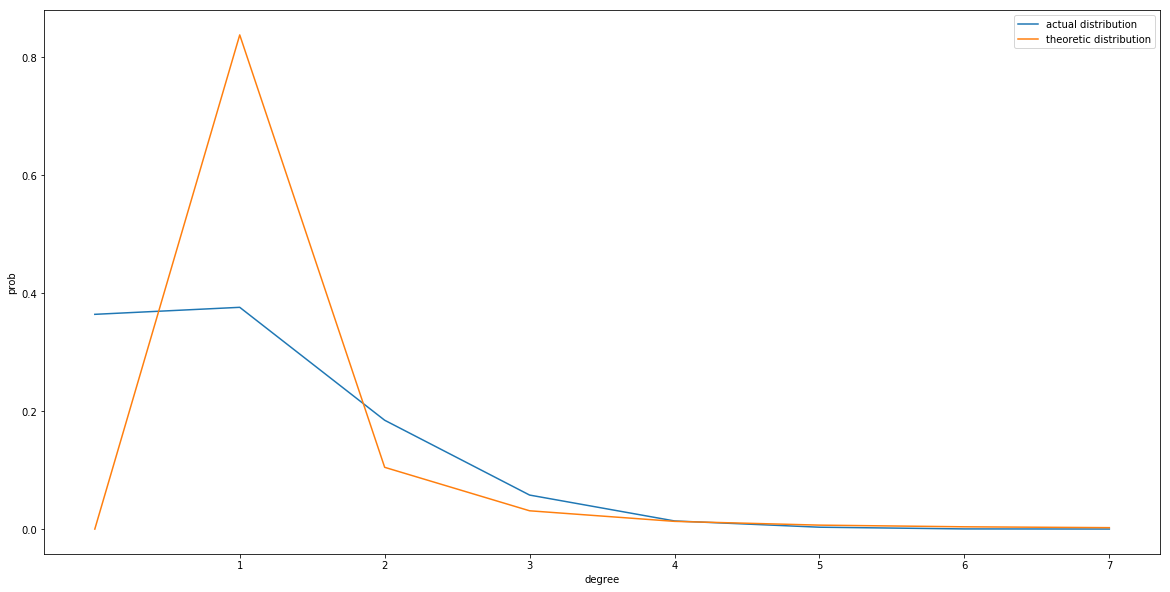

In [32]:
from utils import BANetwork

net = BANetwork(node_nums=10000, gamma=3.0, maxk=20)
net.initialize()

plt.figure(figsize=(20, 10))
degrees = net.degree_distrib()
# degrees = net._degrees

cnt = np.histogram(degrees, bins=np.arange(0, np.max(degrees)+2))

cnt = cnt[0] / net.node_nums
plt.plot(cnt, label='actual distribution')

pk_ba = lambda x : x ** (-3)
draws = np.array([0] + [pk_ba(i) for i in range(1, np.max(degrees)+1)])
draws /= np.sum(draws)

plt.plot(draws, label='theoretic distribution')
# _ = plt.xticks(np.arange(np.max(degrees)+1))

plt.xlabel('degree')
# plt.xlim(1, np.max(degrees)+1)
plt.xticks(ticks=np.arange(1, np.max(degrees)+1))
plt.ylabel('prob')

plt.legend()

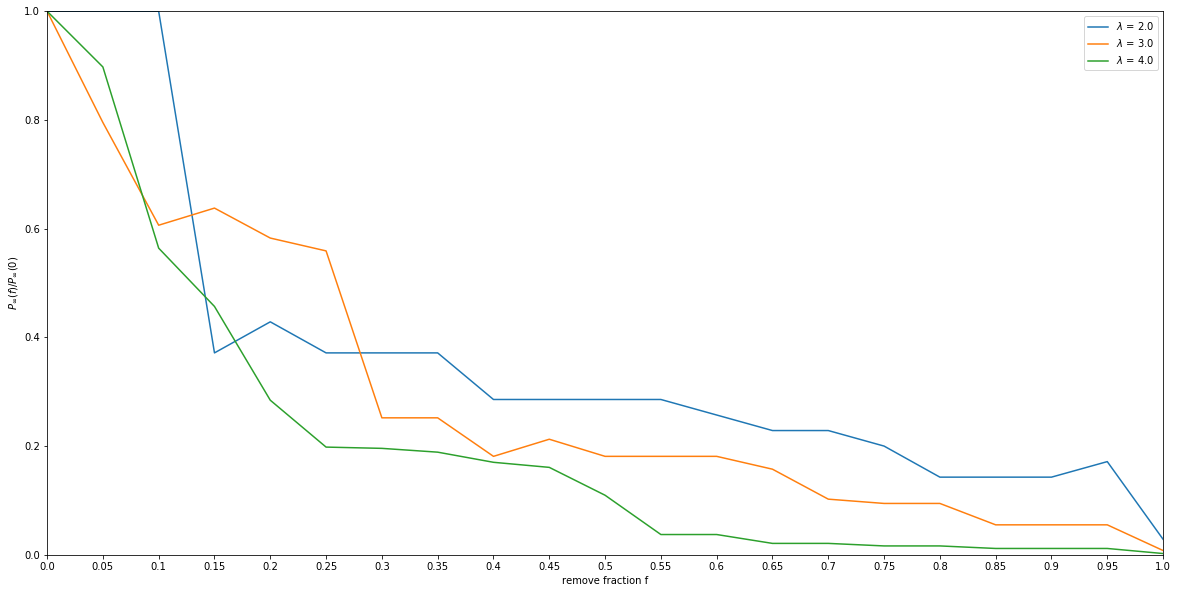

In [50]:
delta = 0.05
basis = 0
iters = int(1.0 / delta)

plt.figure(figsize=(20, 10))
for g in [2.0, 3.0, 4.0]:
    net = BANetwork(node_nums=6000, gamma=g, maxk=1000)
    net.initialize()
    cluster_sizes = []
    belongs = net.bfs()
    max_cluster_size = np.unique(belongs, return_counts=True)[1].max()
    cluster_sizes.append(max_cluster_size)

    for i in range(iters):
        fraction = basis + (i+1)*delta
    #     print('REMOVING FRACTION {:.3f}'.format(fraction))
        net.remove_nodes(delta)
        belongs = net.bfs()
        max_cluster_size = np.unique(belongs, return_counts=True)[1].max()
        cluster_sizes.append(max_cluster_size)
    cluster_sizes = np.array(cluster_sizes)
    cluster_sizes = cluster_sizes / cluster_sizes[0]

    # belongs = net.bfs()
    plt.plot(cluster_sizes, label=r'$\lambda$ = {}'.format(g))

plt.ylabel(r'${P_\infty(f)} / {P_\infty(0)}$')    
plt.xlabel(r'remove fraction f')    
plt.xticks(ticks=np.arange(0, iters + 1), labels=np.arange(0,  iters + 1) / iters)
plt.xlim(0, iters)
plt.ylim(0, 1)
plt.legend()

plt.savefig('./pics/sba.png')